<a href="https://colab.research.google.com/github/ettouilebouael/churn_prediction/blob/main/0_EDA_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13.4})


* SeniorCitizen : Persone agée
* Partner : en couple
* Depedents : si la personne prend en charge d'autres personnes
* tenure : indique le nombre de mois depuis la souscription
* PhoneService : souscription de telephone fixe
* OnlineBackup : service de sauvegard 
* DeviceProtection: garentie 
* PaperlessBilling: le mode de paiement
* TotalCharges: montant des charges totales sur la durée de l'abonement
* Churn : L'abonement



In [4]:
df = pd.read_csv('data.csv', sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
num_col = ["TotalCharges", "MonthlyCharges", "tenure"]

In [8]:
df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
df.TotalCharges = df.TotalCharges.replace(" ", np.NaN)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

## Etude de la variable cible

([<matplotlib.axis.YTick at 0x7f9f42e814d0>,
 [Text(0, 0, 'Non'), Text(0, 1, 'Oui')])

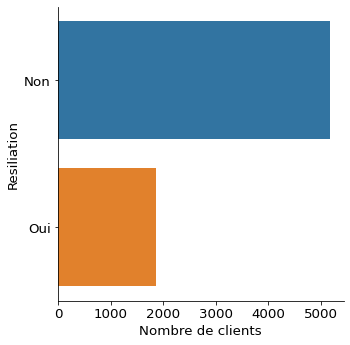

In [100]:
sns.catplot(y="Churn", kind="count", data=df, orient='h')
plt.xlabel("Nombre de clients")
plt.ylabel("Resiliation")
plt.yticks([0,1], ["Non", "Oui"] )

* Les classes sont déséquilibrées
* Les résiliation sont minoritaire

## Etudes des variables numériques

### Nombre de mois depuis la souscription

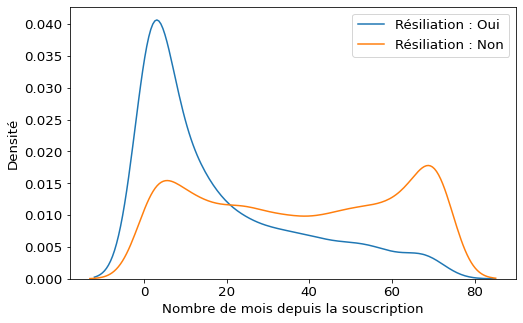

In [42]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","tenure"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","tenure"], label = "Résiliation : Non")
plt.xlabel("Nombre de mois depuis la souscription")
plt.ylabel("Densité")
plt.legend()

* Les nouveaux clients sont plus sucueptibles de résilier

### Frais mensuelles

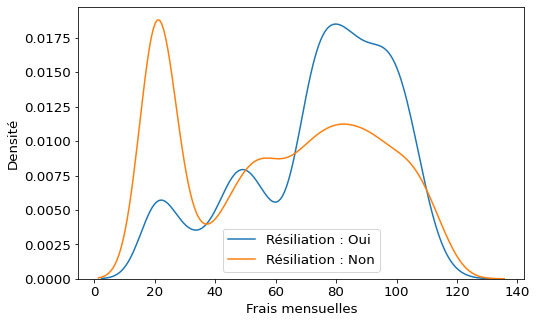

In [43]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","MonthlyCharges"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","MonthlyCharges"], label = "Résiliation : Non")
plt.xlabel("Frais mensuelles")
plt.ylabel("Densité")
plt.legend()

* Les clients ayant des frais mensuelles pas chères  ( >30$) sont moins suceptibles de réislier contrairement aux clients ayant des charges mensuelles élevées.

### Montant des charges totales sur la durée de l'abonemment

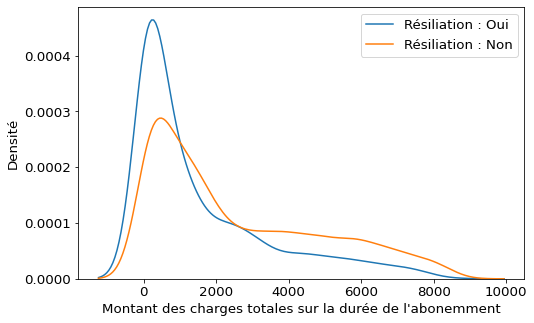

In [55]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.loc[df.Churn == "Yes","TotalCharges"], label = "Résiliation : Oui")
sns.kdeplot(df.loc[df.Churn == "No","TotalCharges"], label = "Résiliation : Non")
plt.xlabel("Montant des charges totales sur la durée de l'abonemment")
plt.ylabel("Densité")
plt.legend()

* 


### Corrélation

In [59]:
df[num_col].corr()

,TotalCharges,MonthlyCharges,tenure
TotalCharges,1.000000,0.651065,0.82588
MonthlyCharges,0.651065,1.000000,0.24790
tenure,0.825880,0.247900,1.00000


* La durée de l'abonnement est fortement corrélée avec la somme total des charges. Cela s'explique du fait que cette somme est d'autant important que la durée de l'abonnement est longue.

## Etude des variables qualitatives

In [111]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Genre

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]


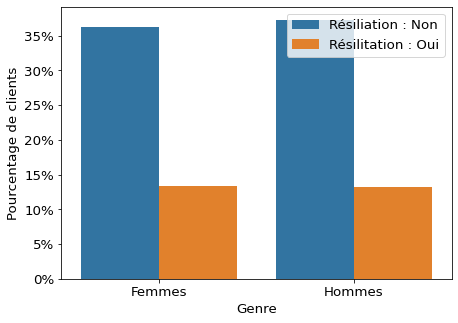

In [252]:
def plot_per(df, feature, xlabel, xticks, rotation = 0):
  data = df.groupby(feature)["Churn"].value_counts().to_frame().rename({"Churn":"count"}, axis = 1).reset_index()
  data["count"] = data["count"] / len(df)
  plt.figure(figsize = (7,5))
  ax = sns.barplot(x = feature, y = "count", hue = "Churn", data = data)
  print([i for i in ax.get_xticklabels()])
  plt.xticks(np.arange(len(xticks)),xticks, rotation = rotation)
  plt.xlabel(xlabel)
  plt.ylabel("Pourcentage de clients")
  vals = ax.get_yticks()
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
  L = plt.legend()
  L.get_texts()[0].set_text("Résiliation : Non")
  L.get_texts()[1].set_text("Résilitation : Oui")

L = plot_per(df, "gender", "Genre", ["Femmes", "Hommes"])


### Personnes Agées

[Text(0, 0, '0'), Text(0, 0, '1')]


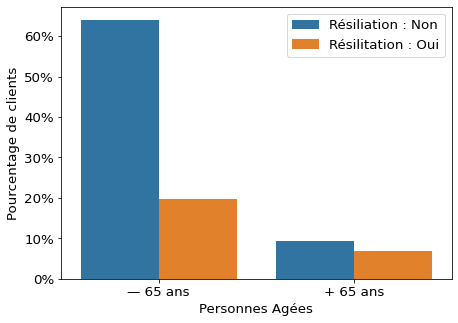

In [204]:
plot_per(df, "SeniorCitizen", "Personnes Agées", ["— 65 ans", "+ 65 ans"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


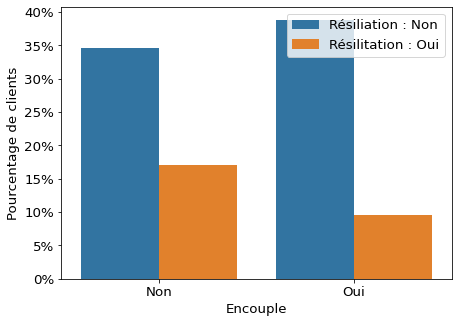

In [205]:
plot_per(df, "Partner", "Encouple", ["Non", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


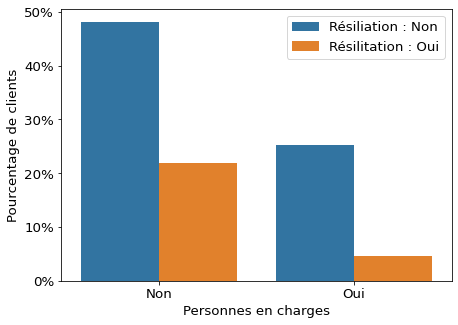

In [206]:
plot_per(df, "Dependents", "Personnes en charges", ["Non", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


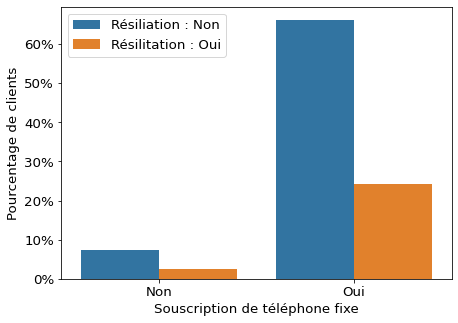

In [207]:
plot_per(df, "PhoneService", "Souscription de téléphone fixe", ["Non", "Oui"])


[Text(0, 0, 'No'), Text(0, 0, 'No phone service'), Text(0, 0, 'Yes')]


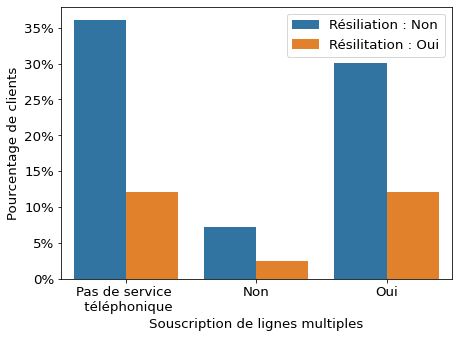

In [213]:
plot_per(df, "MultipleLines", "Souscription de lignes multiples", ["Pas de service \n téléphonique" ,"Non", "Oui"])

[Text(0, 0, 'DSL'), Text(0, 0, 'Fiber optic'), Text(0, 0, 'No')]


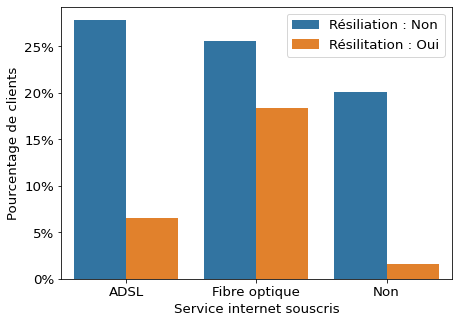

In [216]:
plot_per(df, "InternetService", "Service internet souscris", ["ADSL" ,"Fibre optique", "Non"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


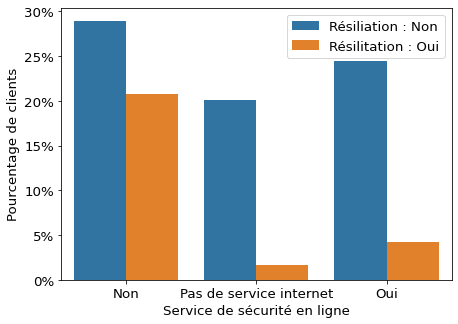

In [225]:
plot_per(df, "OnlineSecurity", "Service de sécurité en ligne", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


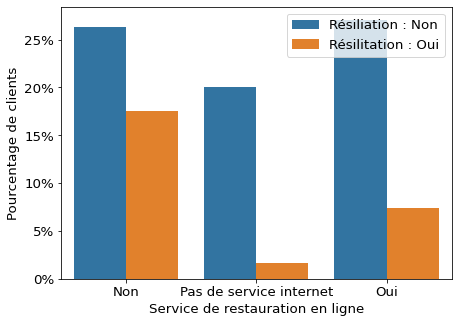

In [224]:
plot_per(df, "OnlineBackup", "Service de restauration en ligne", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


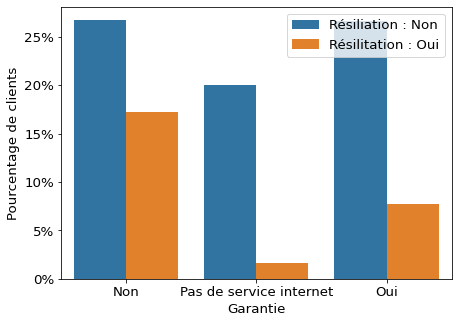

In [227]:
plot_per(df, "DeviceProtection", "Garantie", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


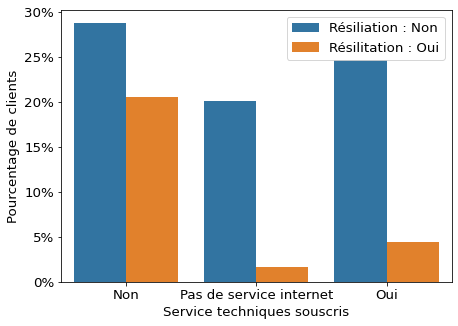

In [229]:
plot_per(df, "TechSupport", "Service techniques souscris", ["Non" ,"Pas de service internet", "Oui"])

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


array(['No', 'Yes', 'No internet service'], dtype=object)

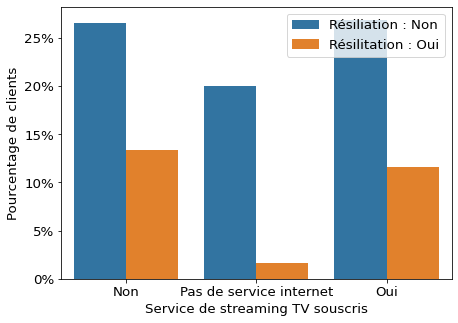

In [237]:
plot_per(df, "StreamingTV", "Service de streaming TV souscris", ["Non" ,"Pas de service internet", "Oui"])
df.StreamingTV.unique()

[Text(0, 0, 'No'), Text(0, 0, 'No internet service'), Text(0, 0, 'Yes')]


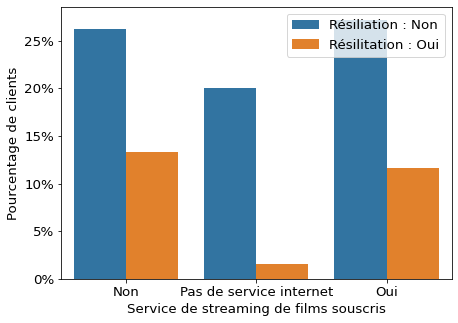

In [238]:
plot_per(df, "StreamingMovies", "Service de streaming de films souscris", ["Non" ,"Pas de service internet", "Oui"])


[Text(0, 0, 'Month-to-month'), Text(0, 0, 'One year'), Text(0, 0, 'Two year')]


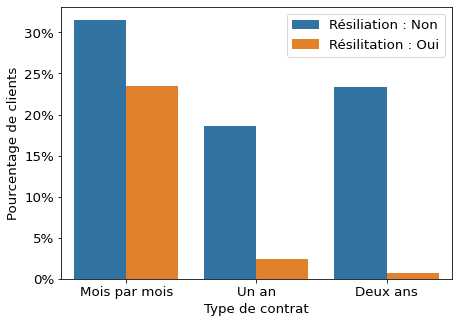

In [241]:
plot_per(df, "Contract", "Type de contrat", ["Mois par mois" ,"Un an", "Deux ans"])


[Text(0, 0, 'No'), Text(0, 0, 'Yes')]


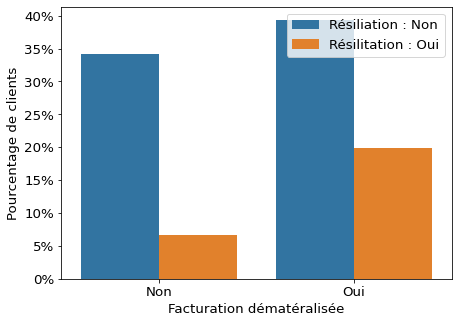

In [242]:
plot_per(df, "PaperlessBilling", "Facturation dématéralisée", ["Non", "Oui"])


[Text(0, 0, 'Bank transfer (automatic)'), Text(0, 0, 'Credit card (automatic)'), Text(0, 0, 'Electronic check'), Text(0, 0, 'Mailed check')]


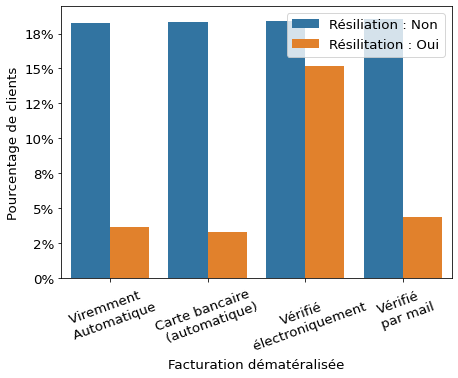

In [256]:
plot_per(df, "PaymentMethod", "Facturation dématéralisée", ["Viremment \n Automatique", "Carte bancaire \n (automatique)", "Vérifié \n électroniquement", "Vérifié \n par mail"], rotation = 20)